# Movement rankings

Which words shift most significantly in semantic space between New England and the deep south?

In [1]:
import numpy as np
import pandas as pd

from gensim.models import KeyedVectors
from scipy.spatial.distance import cosine
from tqdm import tqdm_notebook

from sources import parse_glove_vocab

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [3]:
pd.options.display.max_rows = 1000

In [5]:
m1 = KeyedVectors.load_word2vec_format('../../data/corpora/north-south/new-england.w2v.txt')

In [6]:
m2 = KeyedVectors.load_word2vec_format('../../data/corpora/north-south/deep-south.w2v.txt')

In [7]:
combined = KeyedVectors.load_word2vec_format('../../data/corpora/north-south/combined.w2v.txt')

In [9]:
v1 = parse_glove_vocab('../../data/corpora/north-south/new-england.vocab.txt')

In [10]:
v2 = parse_glove_vocab('../../data/corpora/north-south/deep-south.vocab.txt')

In [11]:
v1_total = sum(v1.values())

In [12]:
v2_total = sum(v2.values())

In [13]:
vocab = parse_glove_vocab('../../data/corpora/north-south/vocab.txt')

In [41]:
m1.most_similar('earth', topn=50)

[('planet', 0.6611870527267456),
 ('flat', 0.4506067931652069),
 ('heaven', 0.4433976411819458),
 ('mother', 0.42221304774284363),
 ('humans', 0.3965595066547394),
 ('moon', 0.3851078748703003),
 ('world', 0.37977415323257446),
 ('mars', 0.3729405403137207),
 ('nasa', 0.367029070854187),
 ('ocean', 0.3626718521118164),
 ('universe', 0.3579068183898926),
 ('nature', 0.3503480553627014),
 ('alien', 0.3462546765804291),
 ('science', 0.32632237672805786),
 ('worlds', 0.3172537088394165),
 ('exist', 0.3115980327129364),
 ('god', 0.3109760880470276),
 ('happiest', 0.3101898431777954),
 ('destroy', 0.30653250217437744),
 ('human', 0.2999586760997772),
 ('mothers', 0.2968764007091522),
 ('🌎', 0.29605579376220703),
 ('humanity', 0.2941015660762787),
 ('the', 0.2896028757095337),
 ('species', 0.2877427637577057),
 ('day', 0.28529858589172363),
 ('life', 0.2831520736217499),
 ('scientists', 0.2808951735496521),
 ('google', 0.28033196926116943),
 ('sea', 0.27928292751312256),
 ('literally', 0.2787

In [40]:
m2.most_similar('earth', topn=50)

[('planet', 0.6582320928573608),
 ('heaven', 0.4366685748100281),
 ('humans', 0.38414978981018066),
 ('mother', 0.3830600082874298),
 ('god', 0.37863433361053467),
 ('nasa', 0.37285831570625305),
 ('nature', 0.37076854705810547),
 ('happiest', 0.36943674087524414),
 ('dust', 0.366108775138855),
 ('world', 0.3646332621574402),
 ('aliens', 0.364328533411026),
 ('dance', 0.3249739408493042),
 ('space', 0.31283432245254517),
 ('human', 0.31199026107788086),
 ('greatest', 0.3072046637535095),
 ('found', 0.3051074743270874),
 ('🌎', 0.29443633556365967),
 ('mars', 0.2938433587551117),
 ('above', 0.29314345121383667),
 ('the', 0.29308223724365234),
 ('living', 0.29220685362815857),
 ('mysterious', 0.2908473014831543),
 ('jesus', 0.29000988602638245),
 ('upon', 0.28865545988082886),
 ('proof', 0.2861965000629425),
 ('land', 0.28618866205215454),
 ('flat', 0.28550148010253906),
 ('lord', 0.28357982635498047),
 ('shadow', 0.283281534910202),
 ('sized', 0.2814238667488098),
 ('alien', 0.2802904844

In [14]:
def neighbor_sim(token, topn=50):
    g1 = [t for t, _ in m1.most_similar(token, topn=topn)]
    g2 = [t for t, _ in m2.most_similar(token, topn=topn)]
    return combined.n_similarity(g1, g2)

In [28]:
neighbor_sim('politics')

0.95429474094438693

In [29]:
neighbor_sim('racism')

0.99003321693806623

In [32]:
neighbor_sim('earth')

0.85254304940642078

In [33]:
neighbor_sim('beyond')

0.34878463674782234

In [42]:
neighbor_sim('tide')

0.30963862470002057

In [16]:
data = []
for token in tqdm_notebook(vocab.keys()):
    
    score = neighbor_sim(token)
    
    c1 = v1[token] / v1_total
    c2 = v2[token] / v2_total

    cr = min([c1, c2]) / max([c1, c2])
    
    data.append((token, vocab[token], v1[token], v2[token], cr, score))

HBox(children=(IntProgress(value=0, max=8104), HTML(value='')))

In [17]:
df = pd.DataFrame(data, columns=('token', 'total_count', 'count1', 'count1', 'count_ratio', 'score'))

In [18]:
df.sort_values('score').head(100)

,token,total_count,count1,count1,count_ratio,score
4245,stopping,7012,3190,3822,0.909500,-0.138845
3468,ian,9258,2026,7232,0.369044,-0.045245
2034,👉,17734,1653,16081,0.135412,-0.030737
303,ma,139016,118791,20225,0.129243,0.025624
3951,fa,7737,2994,4743,0.831565,0.057916
5347,freaks,5126,976,4150,0.309813,0.131155
1820,sec,20054,9022,11032,0.928226,0.171971
5396,beg,5060,1495,3565,0.552432,0.174155
1549,skip,24524,3701,20823,0.234139,0.178089
4483,jungle,6525,1484,5041,0.387806,0.183093


# Distribution of similarity scores, north vs. south

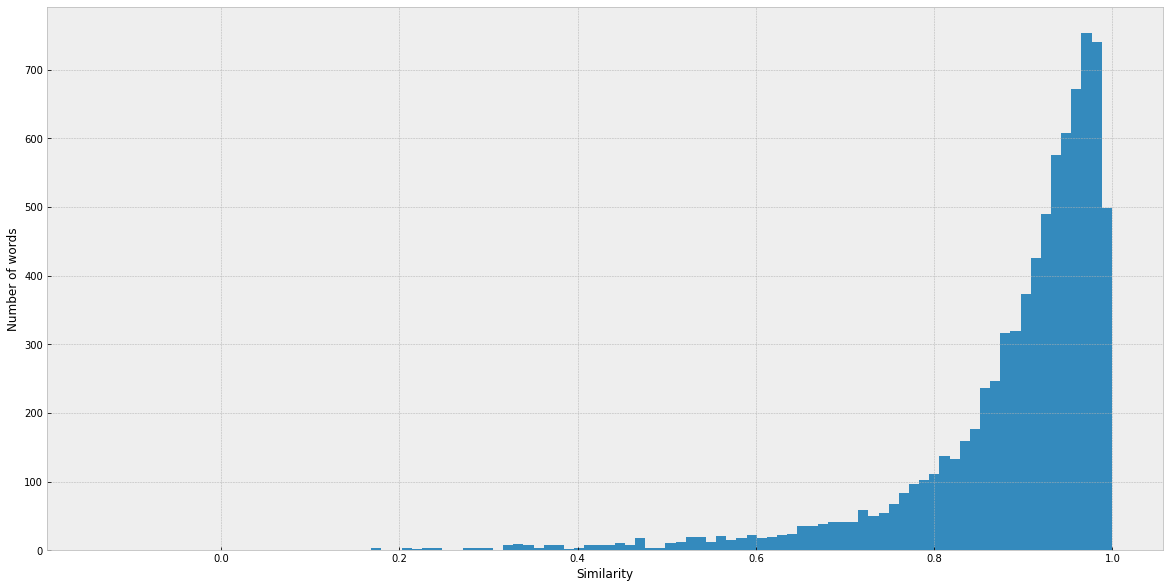

In [25]:
plt.figure(figsize=(20, 10))

plt.xlabel('Similarity')
plt.ylabel('Number of words')
_ = plt.hist(df['score'], bins=100)

# Similarity vs. word count

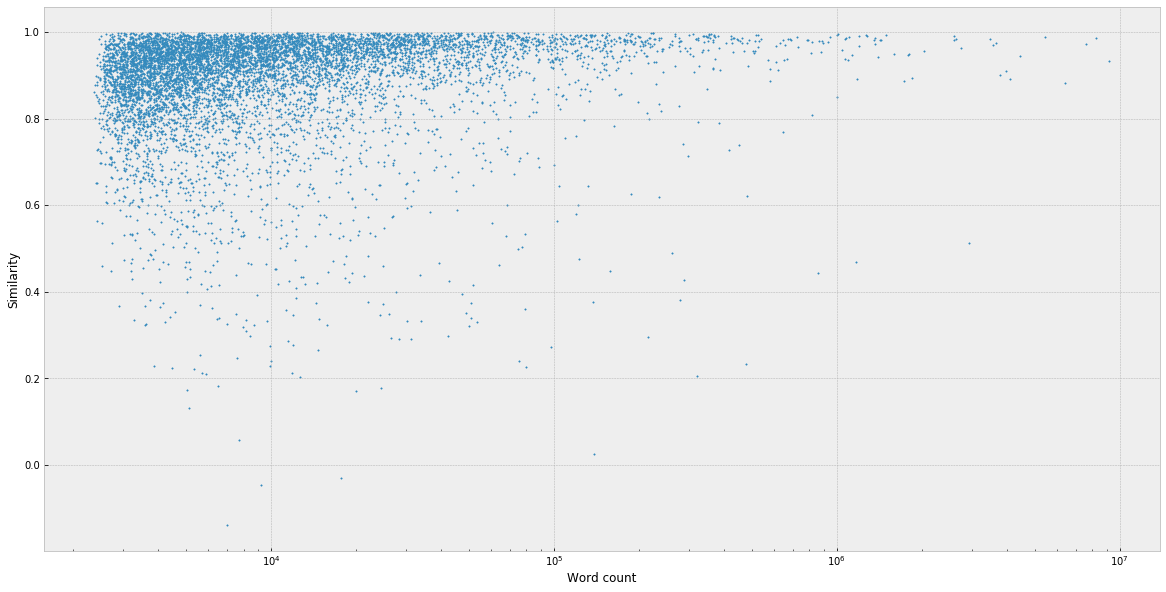

In [24]:
plt.figure(figsize=(20, 10))

plt.xlabel('Word count')
plt.ylabel('Similarity')
plt.xscale('log')
plt.scatter(df['total_count'], df['score'], s=2)

# Balanced frequencies

In [21]:
df[df['count_ratio'] > 0.8].sort_values('score').head(100)

,token,total_count,count1,count1,count_ratio,score
4245,stopping,7012,3190,3822,0.909500,-0.138845
3951,fa,7737,2994,4743,0.831565,0.057916
1820,sec,20054,9022,11032,0.928226,0.171971
507,future,79580,35620,43960,0.936842,0.226782
6500,cr,3866,1866,2000,0.813619,0.229550
2384,labor,14692,6305,8387,0.990321,0.266018
2831,calm,11991,5612,6379,0.862854,0.277469
2926,levels,11493,4583,6910,0.873714,0.285951
1444,heat,26518,11029,15489,0.938016,0.293200
191,everyone,215516,86459,129057,0.882523,0.295592


# Balanced + high overall frequency

In [22]:
df[(df['count_ratio'] > 0.8) & (df['total_count'] > 1e5)].sort_values('score').head(100)

,token,total_count,count1,count1,count_ratio,score
191,everyone,215516,86459,129057,0.882523,0.295592
151,d,279251,131763,147488,0.849700,0.381511
52,now,860101,385685,474416,0.933747,0.442540
35,amp,1171587,487149,684438,0.937616,0.469478
161,w,260984,117267,143717,0.930325,0.489037
12,on,2937944,1297818,1640126,0.959325,0.513302
86,us,480030,231939,248091,0.811969,0.620745
423,super,100151,41593,58558,0.935689,0.691878
144,year,298962,131543,167419,0.966139,0.713589
102,only,415066,178000,237066,0.989118,0.726332
